# Regression in Python

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import warnings 
warnings.filterwarnings('ignore')

# Import Data

In [2]:
manatees = pd.read_csv('../Data/manatees.csv')

In [3]:
manatees.head()

,PowerBoats,ManateeDeaths
0,436,14
1,449,21
2,470,18
3,487,19
4,502,24


# Test Assumptions

# Testing for Linearity and Normality

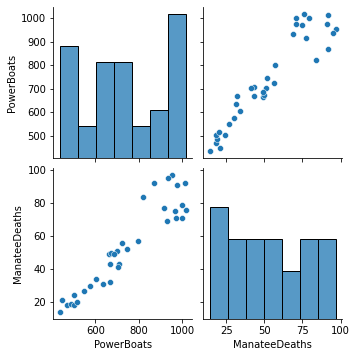

In [4]:
sns.pairplot(manatees)

# Printing a Histogram with a Normal Distribution Curve on it

<AxesSubplot:xlabel='PowerBoats', ylabel='Density'>

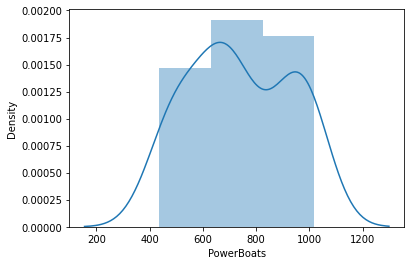

In [13]:
sns.distplot(manatees['PowerBoats'])

<AxesSubplot:xlabel='PowerBoats', ylabel='Density'>

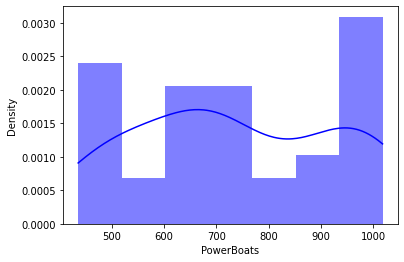

In [26]:
sns.histplot(manatees['PowerBoats'], color="blue", label="PowerBoats", kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='ManateeDeaths', ylabel='Density'>

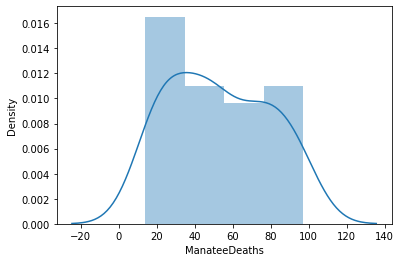

In [27]:
sns.distplot(manatees['ManateeDeaths'])

# Testing for Homoscedasticity

# create the basic model

In [7]:
x = manatees['PowerBoats']
y = manatees['ManateeDeaths']

In [8]:
model = sm.OLS(y,x).fit()

# Still testing for homoscedasticity

In [9]:
pred_val = model.fittedvalues.copy()
true_val = manatees['ManateeDeaths'].values.copy()
residual = true_val - pred_val

# graphing the residuals

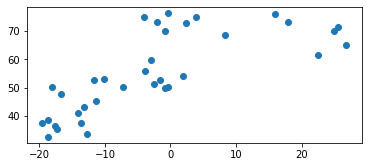

In [10]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

# double check residuals graph with some statistics

In [30]:
sms.diagnostic.het_breuschpagan(residual, manatees[['PowerBoats']])

(14.786518579352652, nan, 24.871600356010788, 1.7849503580150847e-05)

In [31]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=5.479252885631467, pvalue=5.433881942347164e-06)

# boxcox transformation to account for the heteroscedasticity

In [32]:
transformed, _ = boxcox(manatees['PowerBoats'])

# Plot transformed values to see if they have become more normal/more likely to be homoscedastic

(array([3., 4., 2., 2., 6., 4., 2., 1., 3., 8.]),
 array([ 62.82863549,  67.12464318,  71.42065088,  75.71665857,
         80.01266627,  84.30867396,  88.60468165,  92.90068935,
         97.19669704, 101.49270474, 105.78871243]),
 <BarContainer object of 10 artists>)

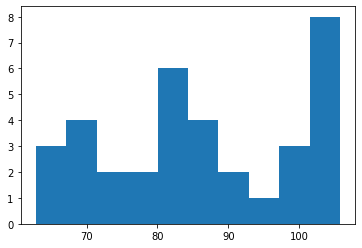

In [33]:
plt.hist(transformed)

# Still not normally distributed

# insert transformed values, and rerun tests for homoscedasticity

In [34]:
x = transformed
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          ManateeDeaths   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              328.1
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                    4.88e-19
Time:                        14:13:35   Log-Likelihood:                         -150.84
No. Observations:                  35   AIC:                                      303.7
Df Residuals:                      34   BIC:                                      305.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6411      0.035     18.113      0.000       0.569       0.713
==============================================================================
Omnibus:                        3.678   Durbin-Watson:                   0.455
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                2.425
Skew:                           0.454   Prob(JB):                        0.297
Kurtosis:                       2.085   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# then create new residual values

In [35]:
pred_val = model1.fittedvalues.copy()
true_val = manatees['ManateeDeaths'].values.copy()
residual = true_val - pred_val

# replot

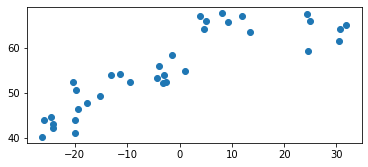

In [36]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

## NEXT

# Testing for Multicollinearity

In [37]:
manatees.corr()

,PowerBoats,ManateeDeaths
PowerBoats,1.000000,0.937637
ManateeDeaths,0.937637,1.000000


<AxesSubplot:>

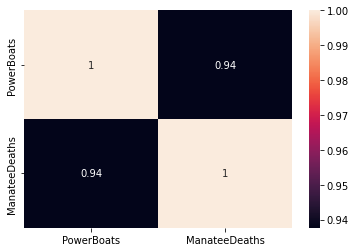

In [38]:
sns.heatmap(manatees.corr(), annot=True)

# Screening for Outliers

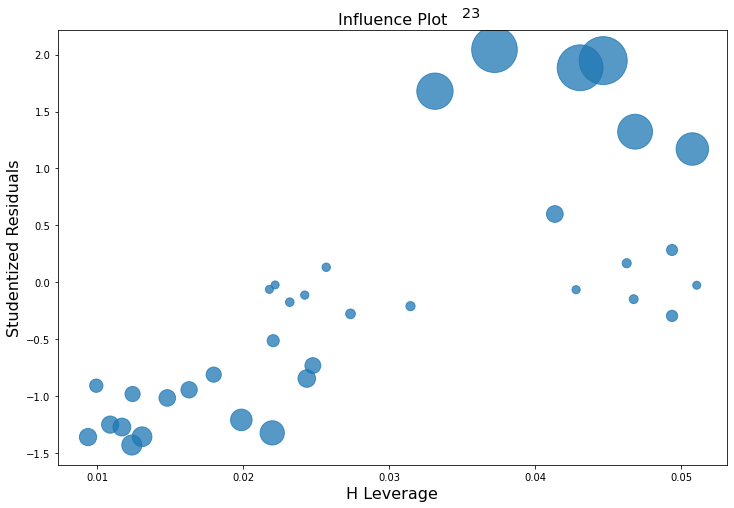

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

# checking via table, instead of graph

In [40]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_PowerBoats   cooks_d  standard_resid  hat_diag  dffits_internal  \
0        -0.132313  0.017079       -1.344190  0.009364        -0.130685   
1        -0.091052  0.008333       -0.911488  0.009930        -0.091285   
2        -0.131236  0.016941       -1.240967  0.010881        -0.130158   
3        -0.138372  0.018804       -1.261270  0.011682        -0.137128   
4        -0.110133  0.012142       -0.982851  0.012413        -0.110190   
5        -0.160086  0.024862       -1.409258  0.012364        -0.157676   
6        -0.156233  0.023818       -1.341372  0.013064        -0.154330   
7        -0.124618  0.015514       -1.016502  0.014792        -0.124555   
8        -0.121656  0.014847       -0.946983  0.016286        -0.121846   
9        -0.109841  0.012187       -0.816096  0.017970        -0.110396   
10       -0.172217  0.029260       -1.201621  0.019862        -0.171055   
11       -0.009384  0.000091       -0.063826  0.021783        -0.009524   
12       -0.017788  0.000

# Interpreting the Regression Output

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          ManateeDeaths   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              584.4
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                    5.35e-23
Time:                        14:13:35   Log-Likelihood:                         -141.48
No. Observations:                  35   AIC:                                      285.0
Df Residuals:                      34   BIC:                                      286.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PowerBoats     0.0750      0.003     24.174      0.000       0.069       0.081
==============================================================================
Omnibus:                        4.022   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.676
Skew:                           0.775   Prob(JB):                        0.159
Kurtosis:                       2.660   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

updated 12/9/2021